In [51]:
import quandl,  math, datetime
import pandas as pd
import numpy as np
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')






df = quandl.get('WIKI/GOOGL')

print(df.head())


              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [52]:
# we are creating the Features for our Regression algorithm

df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume',]]

df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0

df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume',]]

print(df.head())



            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0


In [53]:
forecast_col = 'Adj. Close'

# if there is missing data in our dataset

df.fillna('-99999', inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))






In [54]:
# creating the dataframe for the label

df['label'] = df[forecast_col].shift(-forecast_out)




# print(df.tail())

print(df.head())




            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  3.712563    0.324968   44659000.0  69.078238
2004-08-20   54.322689  0.710922    7.227007   22834300.0  67.839414
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  68.912727
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  70.668146
2004-08-25   53.164113  1.886792    1.183658    9188600.0  71.219849


In [55]:
# features are represented by Letter X and labels by y

X = np.array(df.drop(['label'], 1))




In [56]:
# lets scale our Features

X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out:]

# lets print our new output

df.dropna(inplace=True)

y = np.array(df['label'])
y = np.array(df['label'])


In [57]:

# print(len(X),len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)




In [58]:
# for the classifiers for our features and labels

clf = LinearRegression()

# clf = svm.SVR(kernel='poly')

# for training
clf.fit(X_train, y_train)

# for testing
accuracy = clf.score(X_test, y_test)

# lets print to show the accuracy of our model
# print(accuracy)




In [59]:
# lets start our prediction

forecast_set = clf.predict(X_lately)

# lets print the forecast_set

print(forecast_set, accuracy, forecast_out)



[1107.64556419 1075.07745157 1021.03400793 1065.11041013 1076.45136106
 1076.80321272 1096.05130771 1114.99592661 1118.07654183 1126.43102488
 1135.62146423 1132.52118702 1152.60681156 1168.42731049 1138.84836714
 1125.28584929 1090.33249588 1107.57257681 1118.20240013 1124.59502338
 1139.32278201 1153.73911443 1185.73755702 1189.61218179 1160.45748706
 1172.47889775 1174.22316471 1156.35728987 1121.66245941 1118.48330541
 1116.34779028 1072.59715091 1044.74700519 1076.50675101 1022.50626928] 0.975737551028433 35


Text(0, 0.5, 'Price')

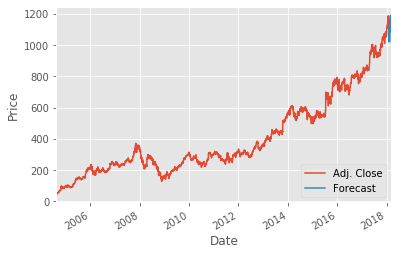

In [65]:
# lets do some stuff

df['Forecast'] = np.nan

last_date = df.iloc[-1].name

last_unix = last_date.timestamp()

one_day = 86400

next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
# lets do some plotting
    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')



